In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
country_df = pd.read_csv("countryexports.csv")
for col in country_df:
    if col != 'Partner':
        country_df[col] = pd.to_numeric(pd.Series(country_df[col]), errors = 'coerce')
country_df.head()

,Partner,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,World,1.148200e+12,1.287440e+12,1.056040e+12,1.278490e+12,1.482510e+12,1.545820e+12,1.578520e+12,1.621870e+12,1.503330e+12,1.451020e+12,1.546270e+12
1,Canada,2.488880e+11,2.611500e+11,2.046580e+11,2.492560e+11,2.812920e+11,2.926510e+11,3.007550e+11,3.128170e+11,2.808550e+11,2.667340e+11,2.822650e+11
2,Mexico,1.359180e+11,1.512200e+11,1.288920e+11,1.636650e+11,1.982890e+11,2.158750e+11,2.259540e+11,2.410070e+11,2.364600e+11,2.300510e+11,2.433140e+11
3,China,6.293689e+10,6.973284e+10,6.949668e+10,9.191108e+10,1.041220e+11,1.105170e+11,1.217460e+11,1.236570e+11,1.158730e+11,1.155460e+11,1.298940e+11
4,Japan,6.115958e+10,6.514175e+10,5.113418e+10,6.047185e+10,6.579974e+10,6.997579e+10,6.523741e+10,6.689184e+10,6.238781e+10,6.322608e+10,6.760508e+10


In [3]:
exports_df = country_df.rename(columns={'Partner': 'Country', '2007': '2007 US Exports ($)', '2008': '2008 US Exports ($)', '2009': '2009 US Exports ($)',
                          '2010': '2010 US Exports ($)', '2011': '2011 US Exports ($)', '2012': '2012 US Exports ($)',
                          '2013': '2013 US Exports ($)', '2014': '2014 US Exports ($)', '2015': '2015 US Exports ($)',
                          '2016': '2016 US Exports ($)', '2017': '2017 US Exports ($)'})
exports_df.head()

,Country,2007 US Exports ($),2008 US Exports ($),2009 US Exports ($),2010 US Exports ($),2011 US Exports ($),2012 US Exports ($),2013 US Exports ($),2014 US Exports ($),2015 US Exports ($),2016 US Exports ($),2017 US Exports ($)
0,World,1.148200e+12,1.287440e+12,1.056040e+12,1.278490e+12,1.482510e+12,1.545820e+12,1.578520e+12,1.621870e+12,1.503330e+12,1.451020e+12,1.546270e+12
1,Canada,2.488880e+11,2.611500e+11,2.046580e+11,2.492560e+11,2.812920e+11,2.926510e+11,3.007550e+11,3.128170e+11,2.808550e+11,2.667340e+11,2.822650e+11
2,Mexico,1.359180e+11,1.512200e+11,1.288920e+11,1.636650e+11,1.982890e+11,2.158750e+11,2.259540e+11,2.410070e+11,2.364600e+11,2.300510e+11,2.433140e+11
3,China,6.293689e+10,6.973284e+10,6.949668e+10,9.191108e+10,1.041220e+11,1.105170e+11,1.217460e+11,1.236570e+11,1.158730e+11,1.155460e+11,1.298940e+11
4,Japan,6.115958e+10,6.514175e+10,5.113418e+10,6.047185e+10,6.579974e+10,6.997579e+10,6.523741e+10,6.689184e+10,6.238781e+10,6.322608e+10,6.760508e+10


In [32]:
dollarchange = exports_df.copy()
dollarchange['10 Year Change ($)'] = dollarchange['2017 US Exports ($)'] - dollarchange['2007 US Exports ($)']
sorted_df = dollarchange.sort_values(by=['10 Year Change ($)'], ascending = False)

new_df = sorted_df[sorted_df.Country != 'World']
filtered_df = new_df.dropna()
filtered_df.head()
biggest_increase = pd.concat([filtered_df.head(5)])
biggest_decrease = pd.concat([filtered_df.tail(5)])
biggest_decrease




,Country,2007 US Exports ($),2008 US Exports ($),2009 US Exports ($),2010 US Exports ($),2011 US Exports ($),2012 US Exports ($),2013 US Exports ($),2014 US Exports ($),2015 US Exports ($),2016 US Exports ($),2017 US Exports ($),10 Year Change ($)
77,Greece,2.110206e+09,1.931571e+09,2.487064e+09,1.106453e+09,1.130970e+09,8.041367e+08,7.390388e+08,7.733365e+08,7.255986e+08,7.466072e+08,9.607286e+08,-1.149477e+09
47,Egypt,5.259281e+09,6.002196e+09,5.253082e+09,6.832542e+09,6.228229e+09,5.498320e+09,5.175216e+09,6.483088e+09,4.758797e+09,3.484754e+09,3.991833e+09,-1.267448e+09
72,Portugal,2.478481e+09,2.645976e+09,1.084848e+09,1.057882e+09,1.315990e+09,1.097096e+09,8.443509e+08,1.120671e+09,9.423008e+08,9.674111e+08,1.192459e+09,-1.286022e+09
67,Finland,3.133422e+09,3.760847e+09,1.661982e+09,2.179532e+09,3.158721e+09,2.566206e+09,2.349052e+09,2.150208e+09,1.559846e+09,1.573471e+09,1.534931e+09,-1.598492e+09
46,Venezuela,1.020051e+10,1.261004e+10,9.315457e+09,1.064480e+10,1.238343e+10,1.751697e+10,1.320053e+10,1.117834e+10,8.343600e+09,5.210558e+09,4.133115e+09,-6.067392e+09


In [19]:
biggest_increase_transposed = biggest_increase.T
biggest_increase_index = biggest_increase_transposed.reset_index()
biggest_increase_index.columns = biggest_increase_index.iloc[0]
biggest_increase_plot = biggest_increase_index.iloc[1:]
export_plot = biggest_increase_plot[biggest_increase_plot.Country != '10 Year Change ($)']
export_plot_renamed = export_plot.rename(columns={'Country': 'Exports by Year'})
export_plot_index = export_plot_renamed.set_index('Exports by Year')
export_plot_index
#df.columns = df.iloc[1]
export_plot_index.to_csv('biggestmoneyincrease.csv', index=False)

[Text(0,0,'0'),
 Text(0,0,'2007'),
 Text(0,0,'2009'),
 Text(0,0,'2011'),
 Text(0,0,'2013'),
 Text(0,0,'2015'),
 Text(0,0,'2017')]

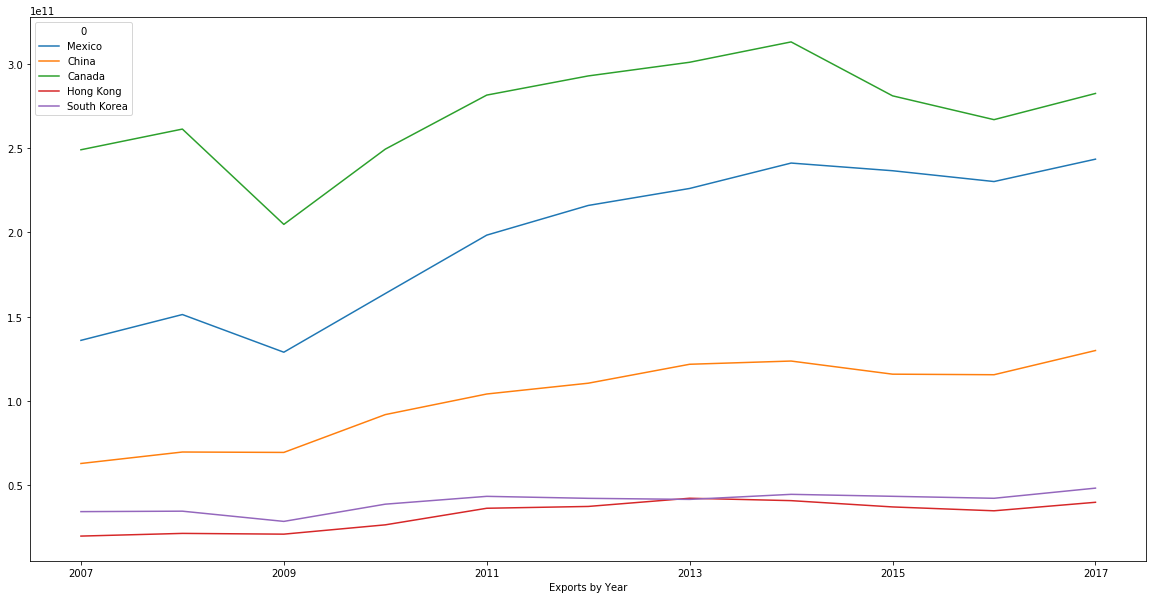

In [12]:
labels = ['0','2007', '2009', '2011', '2013', '2015', '2017']
lines = export_plot_index.plot.line(figsize = (20,10))
lines.set_xticklabels(labels)


In [18]:
biggest_decrease_transposed = biggest_decrease.T
biggest_decrease_index = biggest_decrease_transposed.reset_index()
biggest_decrease_index.columns = biggest_decrease_index.iloc[0]
biggest_decrease_plot = biggest_decrease_index.iloc[1:]
export_plot_decrease = biggest_decrease_plot[biggest_decrease_plot.Country != '10 Year Change ($)']
export_plot_decrease_renamed = export_plot_decrease.rename(columns={'Country': 'Exports by Year'})
export_plot_decrease_index = export_plot_decrease_renamed.set_index('Exports by Year')
export_plot_decrease_index
export_plot_decrease_index.to_csv('biggestmoneydecrease.csv', index=False)

[Text(0,0,'0'),
 Text(0,0,'2007'),
 Text(0,0,'2009'),
 Text(0,0,'2011'),
 Text(0,0,'2013'),
 Text(0,0,'2015'),
 Text(0,0,'2017')]

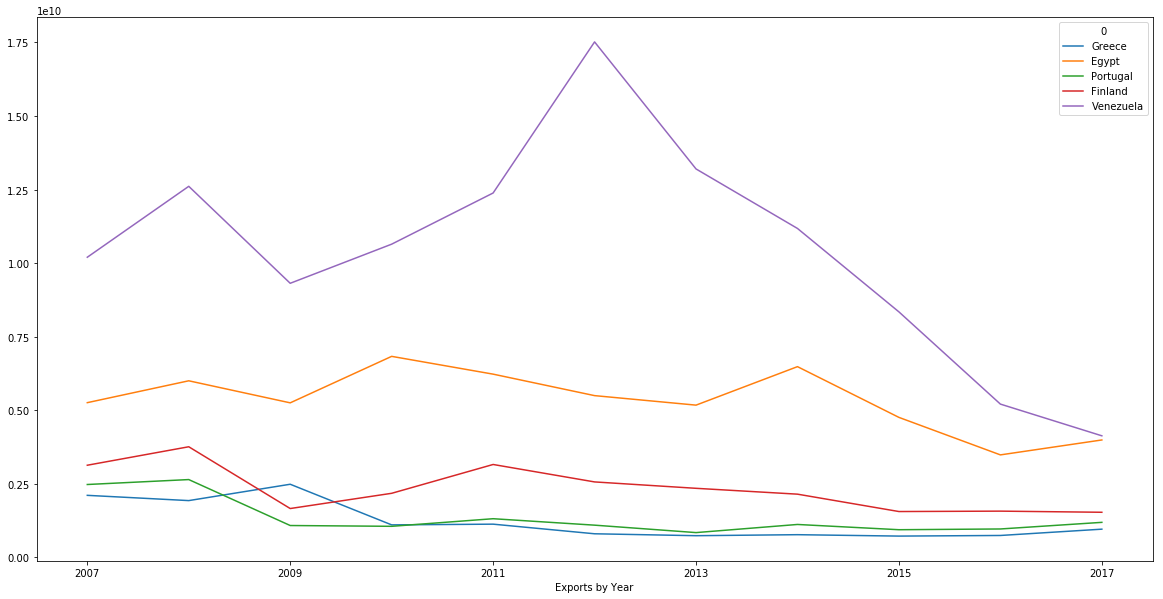

In [13]:
decrease_labels = ['0','2007', '2009', '2011', '2013', '2015', '2017']
decrease_lines = export_plot_decrease_index.plot.line(figsize = (20,10))
decrease_lines.set_xticklabels(decrease_labels)

In [14]:
import plotly.plotly as py
import plotly
plotly.tools.set_credentials_file(username='aacarter', api_key='bRgYQzbaIzM9CASyxSCK')
import pandas as pd

In [16]:
df = pd.read_csv('countryexportswithcode.csv')

data = [ dict(
        type = 'choropleth',
        locations = df['Country Code'],
        z = df['Average Exports'],
        text = df['Country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '$',
            title = 'Export Total<br>Billions US$'),
      ) ]

layout = dict(
    title = 'Export by Country',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~aacarter/0 or inside your plot.ly account where it is named 'd3-world-map'


In [ ]:
filtered_df['10 Year Change (%)'] = filtered_df(['2017 US Exports ($)'] - filtered_df['2007 US Exports ($)']) / filtered_df['2007 US Exports ($)'] * 100


#percent_change_df_filtered.head()
#biggest_increase = pd.concat([filtered_df.head(5)])
#biggest_decrease = pd.concat([filtered_df.tail(5)])
#biggest_decrease
filtered_df

In [65]:
percentchange=dollarchange.copy()
percentchange['10 Year Change (%)'] = (percentchange['2017 US Exports ($)'] - percentchange['2007 US Exports ($)']) / percentchange['2007 US Exports ($)'] * 100
percentchange_sorted = percentchange.sort_values(by=['10 Year Change (%)'], ascending = False)
percent_change_df = percentchange_sorted[percentchange_sorted.Country != 'World']
percent_change_df_filtered = percent_change_df.dropna()
percent_change_df_filtered.head()
biggest_percent_increase = pd.concat([percent_change_df_filtered.head(5)])
biggest_percent_decrease = pd.concat([percent_change_df_filtered.tail(5)])
biggest_percent_decrease






,Country,2007 US Exports ($),2008 US Exports ($),2009 US Exports ($),2010 US Exports ($),2011 US Exports ($),2012 US Exports ($),2013 US Exports ($),2014 US Exports ($),2015 US Exports ($),2016 US Exports ($),2017 US Exports ($),10 Year Change ($),10 Year Change (%)
232,Niue,1662323.0,509662.0,1209612.0,1570975.0,716169.0,771748.0,249064.0,111564.0,71371.0,75803.0,86722.0,-1575601.0,-94.783084
229,Nauru,8140371.0,11240397.0,3687213.0,2492127.0,499196.0,2208920.0,758585.0,812299.0,1733650.0,494811.0,198927.0,-7941444.0,-97.556291
217,Tokelau Islands,55422404.0,39335534.0,12926185.0,3938459.0,4886393.0,13422094.0,828055.0,1387753.0,341222.0,2474242.0,1162557.0,-54259847.0,-97.902370
202,Syrian Arab Republic,361420332.0,408864143.0,303870805.0,503311144.0,230164836.0,19471324.0,21644824.0,6845935.0,3072304.0,3490887.0,6961023.0,-354459309.0,-98.073981
233,North Korea,1728160.0,52151230.0,856793.0,2867073.0,9405834.0,11952220.0,6582817.0,24028661.0,4751721.0,118494.0,2660.0,-1725500.0,-99.846079


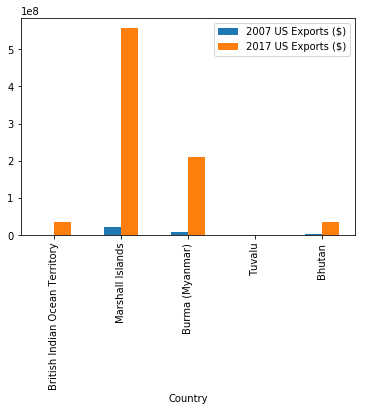

In [66]:
plot_perc_increase = biggest_percent_increase[['Country', '2007 US Exports ($)','2017 US Exports ($)']]
plot_perc_increase.to_csv('biggestpercentincrease.csv', index=False)
plot_perc_increase_df = plot_perc_increase.set_index('Country')
plot_perc_increase_df.plot(kind = 'bar')

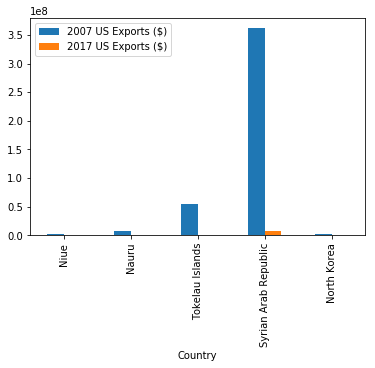

In [67]:
plot_perc_decrease = biggest_percent_decrease[['Country', '2007 US Exports ($)','2017 US Exports ($)']]
plot_perc_decrease.to_csv('biggestpercentdecrease.csv', index=False)
plot_perc_decrease_df = plot_perc_decrease.set_index('Country')
plot_perc_decrease_df.plot(kind = 'bar')